In [1]:
import pandas as pd
import numpy as np

#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv(r'D:\stock_data\^kospi_d.csv',parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-01-04,100.00,100.00,100.00,100.00,NaN
1980-01-05,100.15,100.15,100.15,100.15,NaN
1980-01-07,102.53,102.53,102.53,102.53,NaN
1980-01-08,105.28,105.28,105.28,105.28,NaN
1980-01-09,106.37,106.37,106.37,106.37,NaN


In [5]:
df_month = df.loc[df.groupby(df.index.to_period('M')).apply(lambda x: x.index.max())]
df_month['Change'] = df_month['Close'].pct_change()
df_month['Change12'] = df_month['Close'].pct_change(12)
df_month.fillna(0,inplace=True)
df_month

,Open,High,Low,Close,Volume,Change,Change12
Date,,,,,,,
1980-01-31,105.89,105.89,105.89,105.89,0.0,0.000000,0.000000
1980-02-29,103.74,103.74,103.74,103.74,0.0,-0.020304,0.000000
1980-03-31,105.00,105.00,105.00,105.00,0.0,0.012146,0.000000
1980-04-30,116.09,116.09,116.09,116.09,0.0,0.105619,0.000000
1980-05-31,116.43,116.43,116.43,116.43,0.0,0.002929,0.000000
1980-06-30,112.62,112.62,112.62,112.62,0.0,-0.032724,0.000000
1980-07-31,112.71,112.71,112.71,112.71,0.0,0.000799,0.000000
1980-08-30,112.65,112.65,112.65,112.65,0.0,-0.000532,0.000000
1980-09-30,110.35,110.35,110.35,110.35,0.0,-0.020417,0.000000


In [6]:
init_stock = 100
init_cash = 0
cash_rate = 0.001 # 현금이율을 월 0.1%고정
buy_and_hold = 100

df_month['return_bh'] = 0
df_month['return'] = 0
df_month['stock'] = 0
df_month['cash'] = 0

# 매월 rebalace
for index,row in df_month.iterrows():
    # 이전달 금액에서 수일률 적용
    init_stock = init_stock*(row['Change'] + 1)  
    init_cash = init_cash * (cash_rate + 1)
    buy_and_hold = buy_and_hold*(row['Change'] + 1)
    
    # 데이터프레임에 저장
    df_month.loc[index,'return_bh'] = buy_and_hold
    df_month.loc[index,'return'] = init_stock + init_cash
    if (row['Change12'] > 0) :
        df_month.loc[index,'stock'] = init_stock + init_cash
        df_month.loc[index,'cash'] = 0
    else:
        df_month.loc[index,'stock'] = 0
        df_month.loc[index,'cash'] = init_stock + init_cash
    
    # 다음 step으로 값전달    
    init_stock = df_month.loc[index,'stock']
    init_cash = df_month.loc[index,'cash']    
    buy_and_hold = df_month.loc[index,'return_bh']

In [7]:
df_month

,Open,High,Low,Close,Volume,Change,Change12,return_bh,return,stock,cash
Date,,,,,,,,,,,
1980-01-31,105.89,105.89,105.89,105.89,0.0,0.000000,0.000000,100.000000,100.000000,0.000000,100.000000
1980-02-29,103.74,103.74,103.74,103.74,0.0,-0.020304,0.000000,97.969591,100.100000,0.000000,100.100000
1980-03-31,105.00,105.00,105.00,105.00,0.0,0.012146,0.000000,99.159505,100.200100,0.000000,100.200100
1980-04-30,116.09,116.09,116.09,116.09,0.0,0.105619,0.000000,109.632638,100.300300,0.000000,100.300300
1980-05-31,116.43,116.43,116.43,116.43,0.0,0.002929,0.000000,109.953726,100.400600,0.000000,100.400600
1980-06-30,112.62,112.62,112.62,112.62,0.0,-0.032724,0.000000,106.355652,100.501001,0.000000,100.501001
1980-07-31,112.71,112.71,112.71,112.71,0.0,0.000799,0.000000,106.440646,100.601502,0.000000,100.601502
1980-08-30,112.65,112.65,112.65,112.65,0.0,-0.000532,0.000000,106.383983,100.702104,0.000000,100.702104
1980-09-30,110.35,110.35,110.35,110.35,0.0,-0.020417,0.000000,104.211918,100.802806,0.000000,100.802806


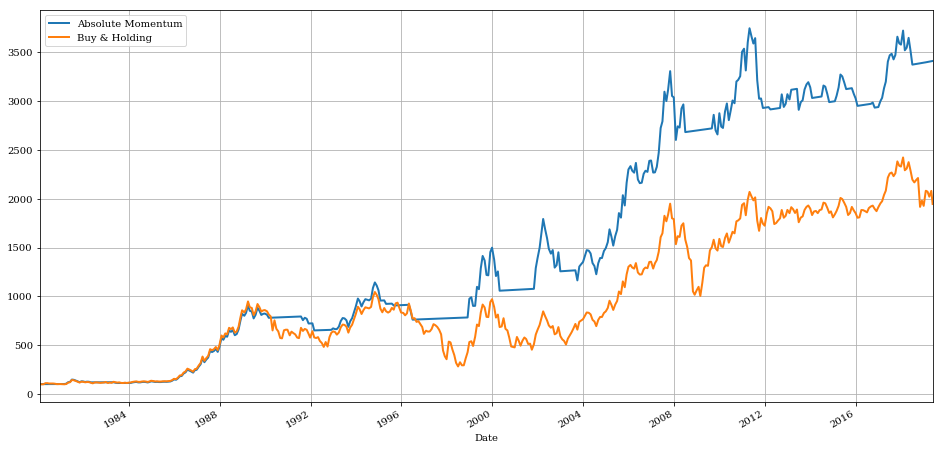

In [8]:
ax = df_month[['return','return_bh']].plot(figsize=(16,8))
ax.legend(["Absolute Momentum", "Buy & Holding"])

In [9]:
number_years = len(df_month.groupby(df_month.index.year).max())
end_price = float(df_month.tail(1)['return'])
start_price = 100
cagr = (pow((end_price/start_price),(1/number_years))-1)*100
print("CAGR : " ,round(cagr,2) ,"%")

CAGR :  9.23 %
